# **Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
data = pd.read_csv('Spam_SMS.csv')
df = data.copy()

In [4]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [5]:
#checking null values
df.isna().sum()

Class      0
Message    0
dtype: int64

In [6]:
# checking duplicate values
df.duplicated().sum()

415

In [7]:
df_sorted = df.sort_values(by='Message')

duplicate_rows = df_sorted[df_sorted.duplicated(subset='Message', keep=False)]

print(duplicate_rows)

     Class                                            Message
2124  spam  +123 Congratulations - in this week's competit...
505   spam  +123 Congratulations - in this week's competit...
2344   ham  1) Go to write msg 2) Put on Dictionary mode 3...
1373   ham  1) Go to write msg 2) Put on Dictionary mode 3...
2163   ham  1) Go to write msg 2) Put on Dictionary mode 3...
...    ...                                                ...
1381   ham                             i dnt wnt to tlk wid u
4004   ham  somewhere out there beneath the pale moon ligh...
1412   ham  somewhere out there beneath the pale moon ligh...
2389   ham  wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
3446   ham  wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...

[705 rows x 2 columns]


In [8]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checking the balance of the dataset

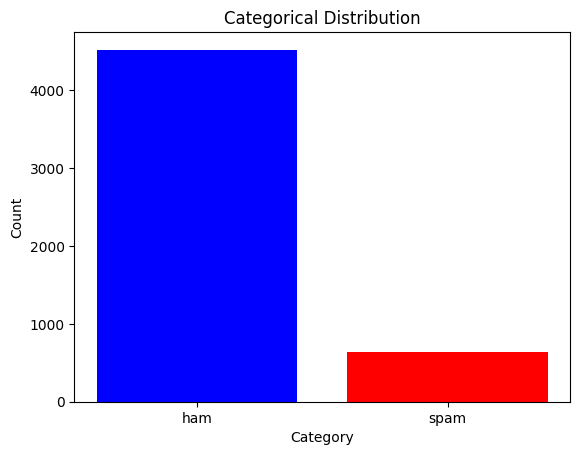

In [10]:
index = df['Class'].value_counts().index
values = df['Class'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Balance the dataset and text cleaning 

In [11]:
balanced_df = df.copy()

In [12]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
balanced_df["Message"] =balanced_df["Message"].apply(preprocess_text)

## Encoding Class

In [13]:
balanced_df['Class'] = balanced_df['Class'].map({'ham': 1, 'spam': 0})

In [14]:
balanced_df

,Class,Message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
...,...,...
5569,0,this is the 2nd time we have tried 2 contact u...
5570,1,will ü b going to esplanade fr home
5571,1,pity was in mood for that soany other suggestions
5572,1,the guy did some bitching but i acted like id ...


## Under Sampling

In [15]:
from imblearn.under_sampling import RandomUnderSampler

X = balanced_df.drop(['Class'],axis=1)
y = balanced_df['Class']

resample = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = resample.fit_resample(X, y)

## Over_Sampling

In [16]:
# from imblearn.over_sampling import RandomOverSampler

# X = balanced_df.drop(['Class'],axis=1)
# y = balanced_df['Class']

# resample = RandomOverSampler(random_state=0)
# X_resampled,y_resampled = resample.fit_resample(X,y)

## Most Common Words

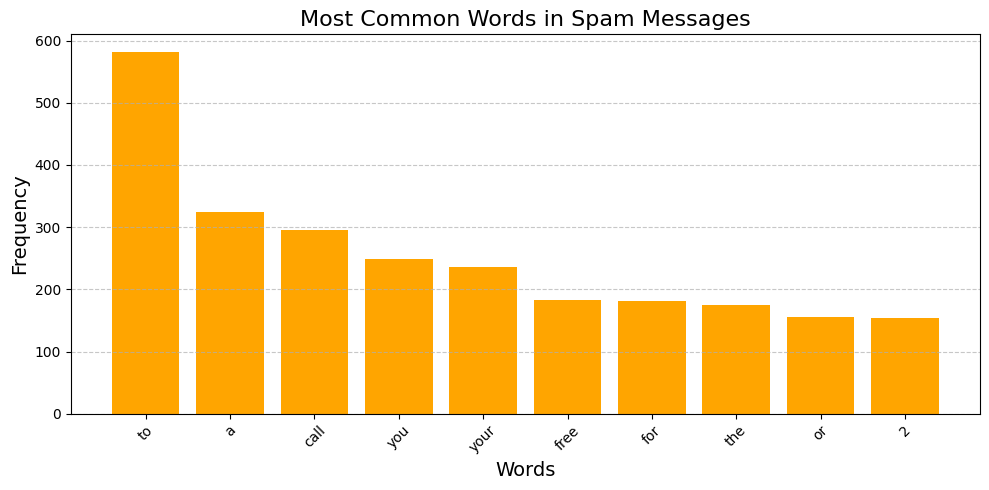

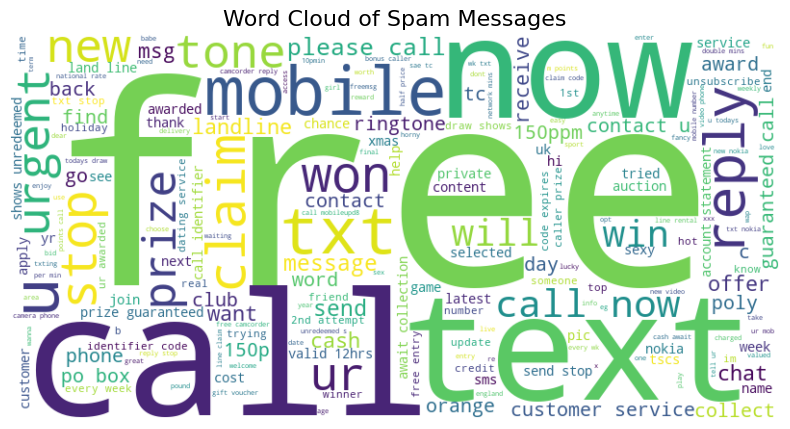

In [17]:
from wordcloud import WordCloud
from collections import Counter
# Count the frequency of words in spam messages
spam_words = ' '.join(balanced_df[balanced_df['Class'] == 0]['Message'])
spam_words_list = spam_words.split()
word_counts = Counter(spam_words_list)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

# Plotting the most common words in spam messages
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='orange')
plt.title('Most Common Words in Spam Messages', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Generate a word cloud for the spam messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Spam Messages', fontsize=16)
plt.show()

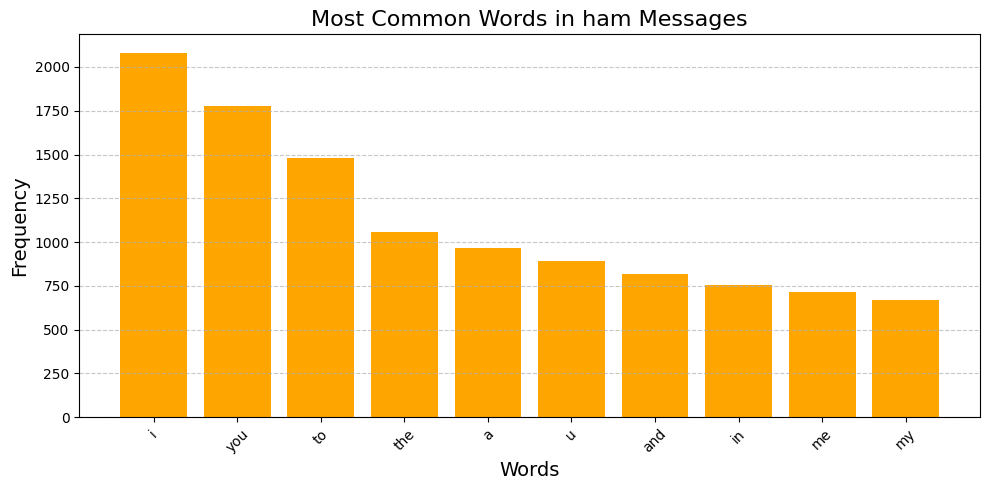

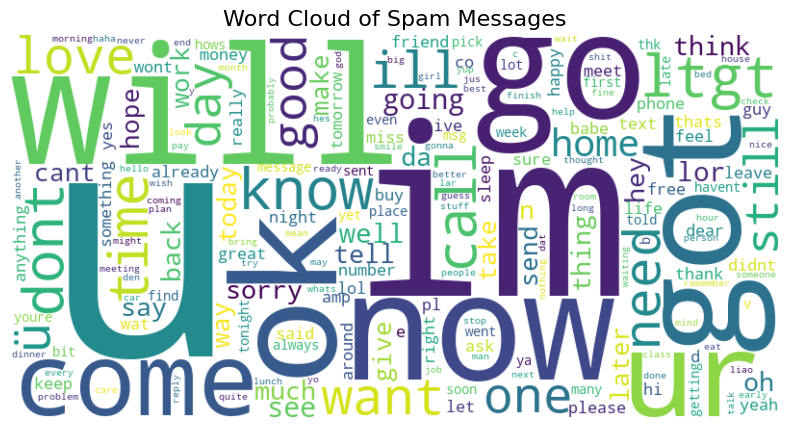

In [18]:
# Count the frequency of words in ham messages
spam_words = ' '.join(balanced_df[balanced_df['Class'] == 1]['Message'])
spam_words_list = spam_words.split()
word_counts = Counter(spam_words_list)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

# Plotting the most common words in spam messages
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='orange')
plt.title('Most Common Words in ham Messages', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Generate a word cloud for the spam messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Spam Messages', fontsize=16)
plt.show()

# Preparing Data for Machine Learning

## Tfidf Vectorizer

In [19]:
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
X = tf.fit_transform(X_resampled['Message']).toarray()

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
y = np.array(y_resampled) # convert the label into numpy array

In [22]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Split into train and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML algorithm

## Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

accuracy from native bayes: 93.39 %
f1 score from naive bayes: 93.00 %
classification report :

               precision    recall  f1-score   support

           0       0.97      0.91      0.94       140
           1       0.90      0.97      0.93       117

    accuracy                           0.93       257
   macro avg       0.93      0.94      0.93       257
weighted avg       0.94      0.93      0.93       257



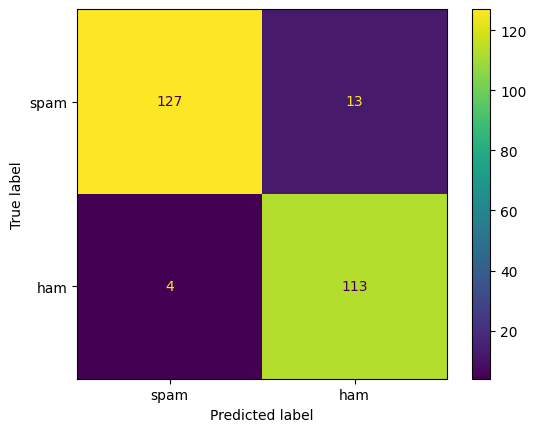

In [25]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pred_nav = nb.predict(X_test)

# Checking the performance

print(f"accuracy from native bayes: {accuracy_score(y_test,pred_nav)*100:.2f} %")
print(f"f1 score from naive bayes: {f1_score(y_test,pred_nav)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,pred_nav))

#confusion matrix
clf_nav = confusion_matrix(y_test,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['spam','ham']).plot()
plt.show()

## XGBoost

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

accuracy from XGB:86.77 %
f1 score from XGB: 87.02 %
classification report : 
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       140
           1       0.79      0.97      0.87       117

    accuracy                           0.87       257
   macro avg       0.88      0.88      0.87       257
weighted avg       0.89      0.87      0.87       257



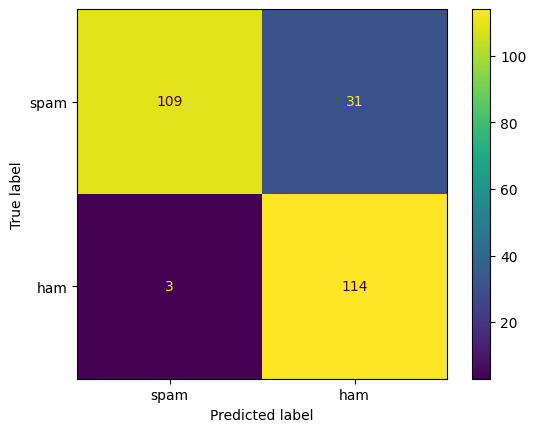

In [27]:
#prediction
pred_xgb = xgb.predict(X_test)

#performance
print(f"accuracy from XGB:{accuracy_score(y_test,pred_xgb)*100:.2f} %")
print(f"f1 score from XGB: {f1_score(y_test,pred_xgb)*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_xgb))

#confusion matrix
clf_xgb = confusion_matrix(y_test,pred_xgb)
cx_ = ConfusionMatrixDisplay(clf_xgb,display_labels=['spam','ham']).plot()
plt.show()

## Random Forest

In [28]:
rnf = RandomForestClassifier() #passing object
rnf.fit(X_train,y_train)

RandomForestClassifier()

accuracy from rnadom forest:89.11 %
f1 score from random forest: 89.31 %
classification report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       140
           1       0.81      1.00      0.89       117

    accuracy                           0.89       257
   macro avg       0.90      0.90      0.89       257
weighted avg       0.91      0.89      0.89       257



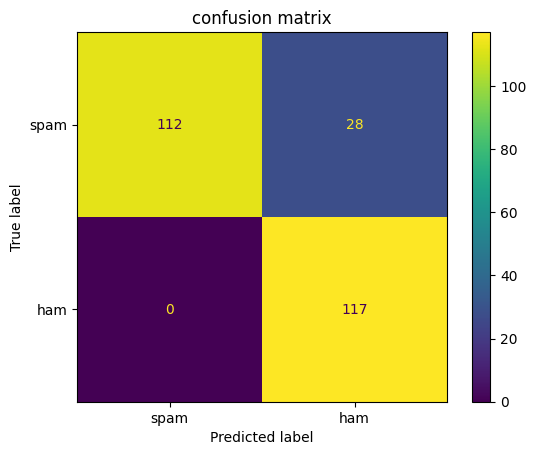

In [29]:
#prediction
pred_rnf = rnf.predict(X_test)

#performance
print(f"accuracy from rnadom forest:{accuracy_score(y_test,pred_rnf)*100:.2f} %")
print(f"f1 score from random forest: {f1_score(y_test,pred_rnf)*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_rnf))

#confusion matrix
clf_rnf = confusion_matrix(y_test,pred_rnf)
cx_ = ConfusionMatrixDisplay(clf_rnf,display_labels=['spam','ham']).plot()
plt.title("confusion matrix")
plt.show()

# Deep Learning Neural Network

## Preprocessing data

In [30]:
max_len = 150 #Fixed the length of each vector

tk = Tokenizer()

# Process the text

tk.fit_on_texts(X_resampled['Message'])
sequences = tk.texts_to_sequences(X_resampled['Message'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [31]:
len(vector)

1282

In [32]:
#convert feature vector and label into array
X_d = np.array(vector)
y_d = np.array(y_resampled)

In [33]:
X_d

array([[  14,  173,   18, ...,    0,    0,    0],
       [ 306,  149,   87, ...,    0,    0,    0],
       [ 282,   73,    3, ...,    0,    0,    0],
       ...,
       [4615,   87,   26, ...,    0,    0,    0],
       [ 476,    7,  203, ...,    0,    0,    0],
       [ 182,    1,  165, ...,    0,    0,    0]], dtype=int32)

In [34]:
y_d

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

## Bidirectional

In [36]:
model_bi = Sequential() # Sequential() API
model_bi.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_bi.add(Bidirectional(LSTM(units=100)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(1, activation='sigmoid'))

In [37]:
model_bi.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [38]:
model_bi.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (you can also use 'val_accuracy')
    patience=2,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the weights of the model to the epoch with the best performance
    verbose=1              # Prints a message when early stopping is triggered
)

In [40]:
historical = model_bi.fit(X_d_train,y_d_train, epochs=10, batch_size=16, validation_data=(X_d_test,y_d_test), callbacks=[early_stopping],  # Use the EarlyStopping callback
    verbose=1)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.6462 - loss: 0.6089 - val_accuracy: 0.8872 - val_loss: 0.3055
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9281 - loss: 0.2002 - val_accuracy: 0.9416 - val_loss: 0.1556
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9794 - loss: 0.0946 - val_accuracy: 0.9650 - val_loss: 0.1414
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9779 - loss: 0.0874 - val_accuracy: 0.9416 - val_loss: 0.1547
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9913 - loss: 0.0475 - val_accuracy: 0.9533 - val_loss: 0.1441
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


In [41]:
model_bi.evaluate(X_d_test,y_d_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9704 - loss: 0.1291


[0.1413847804069519, 0.9649805426597595]

In [42]:
y_pred_prob_bi = model_bi.predict(X_d_test)
y_pred_bi = (y_pred_prob_bi > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [43]:
print(f"f1 score: {f1_score(y_d_test,y_pred_bi)*100:.2f} %")
print("classification report : \n",classification_report(y_d_test,y_pred_bi))

f1 score: 96.20 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       140
           1       0.95      0.97      0.96       117

    accuracy                           0.96       257
   macro avg       0.96      0.97      0.96       257
weighted avg       0.97      0.96      0.97       257



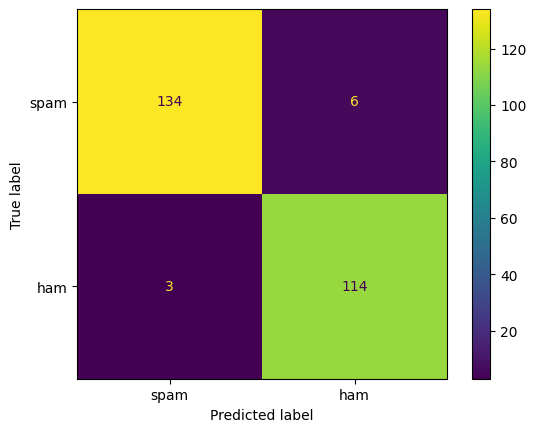

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_bi = confusion_matrix(y_d_test,y_pred_bi)
ax_bi = ConfusionMatrixDisplay(confusion_matrix=cnf_bi,display_labels=['spam','ham'])
ax_bi.plot()
plt.show()

 You can run with over sampling as well. 
## Thanks 